In [1]:
import numpy as np
import matplotlib.pyplot as plt

from alpub_autoencoder.autoencoder_utils import read_alpub_data
from PIL import Image

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
ALPUB_PATH = '../../Datasets/alpub_v2/images'

In [3]:
X,Y = read_alpub_data(path=ALPUB_PATH)

Processing Alpha
Processing Beta
Processing Chi
Processing Delta
Processing Epsilon
Processing Eta
Processing Gamma
Processing Iota
Processing Kappa
Processing Lambda
Processing LunateSigma
Processing Mu
Processing Nu
Processing Omega
Processing Omicron
Processing Phi
Processing Pi
Processing Psi
Processing Rho
Processing Tau
Processing Theta
Processing Upsilon
Processing Xi
Processing Zeta


In [4]:
Y.shape

(205797, 24)

In [5]:
X.shape

(205797, 70, 70, 3)

In [6]:
# Convert the RGB images to grayscale
X_gray = []
for img in X:
    image_gray = Image.fromarray(img).convert("L")
    X_gray.append(np.array(image_gray))

In [55]:
# Load the greyscaled image

image_no = 100569
image = X_gray[image_no]

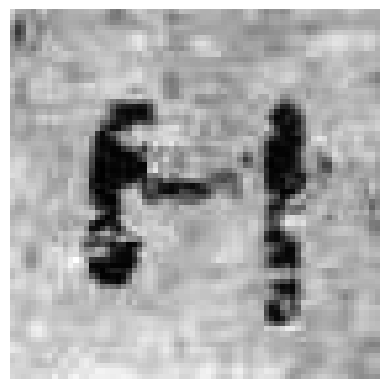

In [56]:
# Display the grayscale image
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

In [52]:
import cv2

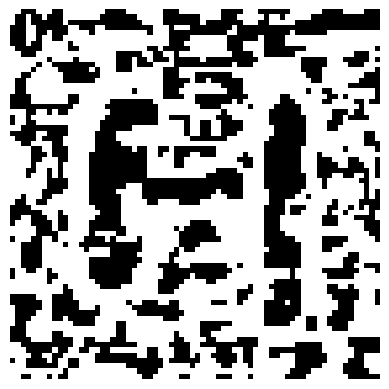

In [59]:
# Apply adaptive thresholding

# Set the blockSize and C parameters as per your requirements
thresholded_image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize=11, C=2)

# Display the thresholded image
# Display the grayscale image
plt.imshow(thresholded_image, cmap="gray")
plt.axis("off")
plt.show()